In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
import tifffile
from psfgenerator import *
import csv
from scipy import ndimage
from PIL import Image

Intensity Measurements
$$I(\textbf{r}) = \langle \hat{E}^{(+)}\hat{E}^{(-)} \rangle \ \propto \sum_{i=1}^N \textit{h}(\textbf{r} - \textbf{r}_i)$$ 
$$\hat{E}^{(+)} = \sum_{i} \left[\cfrac{2J_1(|\textbf{r}-\textbf{r}_i|)}{|\textbf{r}-\textbf{r}_i|}exp(i\phi_i) \hat{\sigma_i}\right]$$
$\langle exp(i\phi_i)exp(i\phi_j)\rangle = 0 \quad\quad i \neq j$

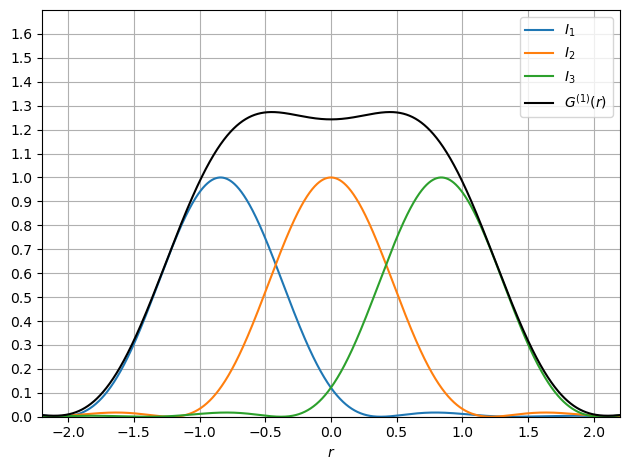

In [3]:
x = np.linspace(-2.2, 2.2, 5000)
r = 0.84
I0 = 1
#It is really funny if we change the value of x in the denominator even a small bit without changing x in the numerator

I1 = I0 * (2*(sp.jv(1,np.abs(np.pi*(x+r))))/(np.abs(np.pi*(x+r))))**2
I2 = I0 * (2*(sp.jv(1,np.abs(np.pi*(x))))/(np.abs(np.pi*(x))))**2
I3 = I0 * (2*(sp.jv(1,np.abs(np.pi*(x-r))))/(np.abs(np.pi*(x-r))))**2

G = I1+I2+I3

plt.plot(x, I1)
plt.plot(x, I2)
plt.plot(x, I3)
plt.plot(x,G,'k-')

plt.xlabel('$r$')
plt.xlim(-2.2,2.2)
plt.ylim(0,1.7)
plt.yticks(np.arange(0,1.7,0.1))
plt.legend(['$I_1$','$I_2$','$I_3$',r'$G^{(1)}(r)$'])
plt.grid(True)
plt.tight_layout()
plt.savefig('intensity_measurement.png',format='png',dpi=600,transparent=True)

Square of the intensity
$[G^{(1)}(r)]^2 = \sum_{i=1}^N [h(r-r_i)]^2 + \sum_{i\neq j}^N h(r-r_i)h(r-r_j)$

In [4]:
G12 = G**2

2nd order Glauber autocorrelation function
$$G^{(2)}(r) = G^{(2)}(r,r) = \langle \hat{E}^{(-)}\hat{E}^{(-)}\hat{E}^{(+)}\hat{E}^{(+)} \rangle \propto 2\sum_{i\neq j}^N h(r-r_i)h(r-r_j) \\
= 2 \times (I_1I_2 + I_2I_3 + I_3I_1) $$

In [5]:
G2 = 2*((I1*I2) + (I2*I3) + (I3*I1)) 

$CM_2$ signal
$$CM_2 = (G^{(1)}(r))^2 - \frac{1}{2}G^{(2)}(r) = \sum_{i=1}^N h_2(r-r_i)$$

In [6]:
CM2 = G12 - G2

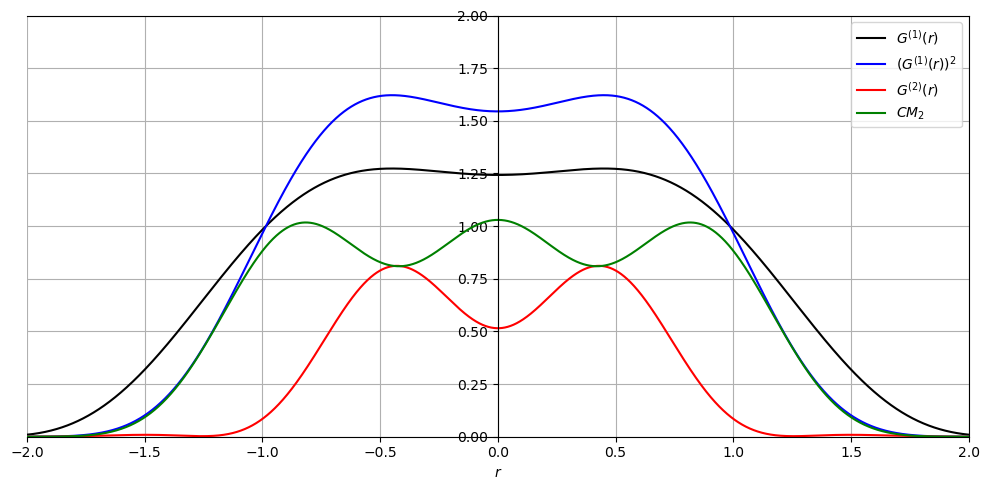

In [7]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x,G,'k-')
ax.plot(x,G12,'b-')
ax.plot(x,G2,'r-')
ax.plot(x,CM2,'g-')
ax.set_xlabel('$r$')
ax.set_xlim(-2.0,2.0)
ax.set_ylim(0,2)
ax.spines['left'].set_position('center')
ax.set_yticks(np.arange(0,2,0.5),minor=True)
ax.legend([r'$G^{(1)}(r)$',r'$(G^{(1)}(r))^2$',r'$G^{(2)}(r)$','$CM_2$'])
ax.grid(True)
plt.tight_layout()
plt.savefig('cm2.png',transparent=True,dpi = 600)

With Structured Illumination
$$G^{(1)}(r) = \sum_{i=1}^N \textit{h}(\textbf{r} - \textbf{r}_i) \times I_{str}(r_i,\alpha,\phi)$$

Combining Structured illumination pattern with the $CM_2$ signal gives the $SIQCM_2$ signal
$$SIQCM_2 = \sum_{i=1}^N \textit{h}_2(\textbf{r} - \textbf{r}_i) \times (I_{str}(r_i,\alpha,\phi))^2$$

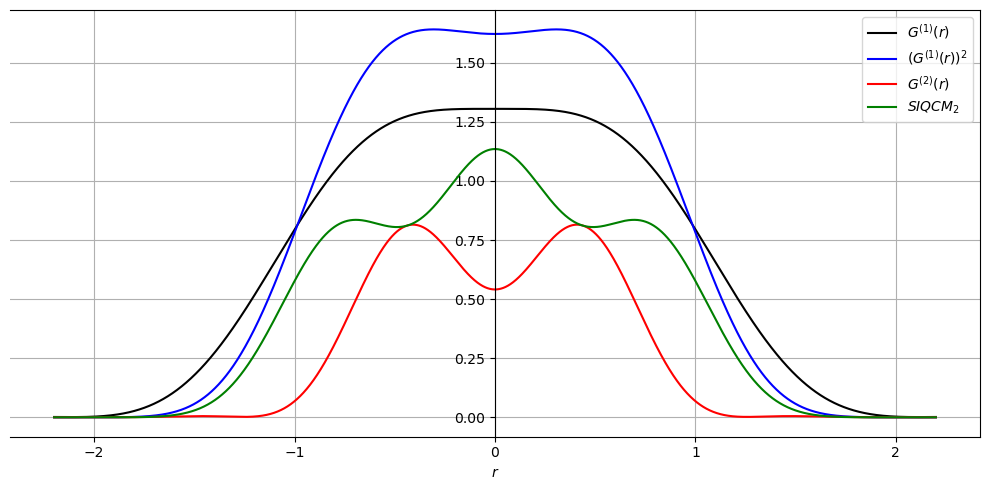

In [10]:
#Changing the phase values by adding or subtracting a constant to x inside np.cos() seems to shift the curve towards one or the
#other illumination points. This is in accordance with what is given in the caption for these graphs in the paper. 
#Try producing 3 graphs using this.

k = 1
I_str = 1.05*(0.5 + 0.5*np.cos(k*x))
SI1 = G*I_str
SI2 = G12 * I_str
SIG2 = G2 * I_str
SIQCM2 = CM2 * I_str**2 

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
plt.plot(x,SI1,'k-')
plt.plot(x,SI2,'b-')
plt.plot(x,SIG2,'r-')
plt.plot(x,SIQCM2,'g-')
ax.set_xlabel('$r$')
ax.spines['left'].set_position('center')
ax.set_yticks(np.arange(0,2,0.5),minor=True)
ax.legend([r'$G^{(1)}(r)$',r'$(G^{(1)}(r))^2$',r'$G^{(2)}(r)$','$SIQCM_2$'])
ax.grid(True)
plt.tight_layout()
plt.savefig('siqcm_comparison.png',transparent=True,dpi = 600)

In [9]:
I1 = (2*(sp.jv(1,np.abs(np.pi*(x+r))))/(np.abs(np.pi*(x+r))))**2